In [515]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as p
import math

In [520]:
#Generate hopfield net that encodes x matricies of y*y size

# generate 1d pattern of random values in [-1,1]
def gen2dPattern(size):
    return (np.round(np.random.rand(size)) * 2) -1

# generate hopfield network (affinity matrix between node i and nodes != i)
# multiple input patterns share matrix values
def genNetwork(inputPatterns):
    assert(inputPatterns.size > 0)
    w = np.zeros((inputPatterns[0].size, inputPatterns[0].size))
    
    # for each weight
    for i in range(0, w.shape[0]):
        for j in range(0, w.shape[1]):
            acc = 0
            for x in range(0, inputPatterns.shape[0]):
                acc += inputPatterns[x][i] * inputPatterns[x][j]
            w[i,j] = acc #/ inputPatterns.shape[0]
    np.fill_diagonal(w,0)
    return w
    
# generate prediction from weight matrix
def updateNode(n, w):
    print("New pattern...")
    n_update = np.copy(n)
    while True:
        print("epoch")
        n_check = np.copy(n_update)
        for i in range(0, n.size):
            v = 0
            for j in range(0, n.size):
                if i != j:
                    v += w[j,i] * n_update[j]
            if v >= 0:
                n_update[i] = 1
            else:
                n_update[i] = -1

        if np.all(np.equal(n_check, n_update)):
            return n_update
    raise Exception("Failed control flow")

# gaussian blurs matrix
# blurring is wrapped
# assumes convertable to 2d
def distortPattern(p):
    assert(int(math.sqrt(p.size) + 0.5) ** 2 == p.size)
    dim = int(math.sqrt(p.size))
    p_distort = np.copy(p)
    
    for i in range(0, p.size):
        p_distort[i] = (p[i] 
                        + p[(i+1)%p.size] 
                        + p[(i-1)%p.size] 
                        + p[(i+dim)%p.size] 
                        + p[(i+dim+1)%p.size]
                        + p[(i+dim-1)%p.size] 
                        + p[(i-dim)%p.size]
                        + p[(i-dim+1)%p.size]
                        + p[(i-dim-1)%p.size]) / 9
        
            
    return p_distort

In [521]:
# preset constants
patternDim = 10
patternSize = patternDim * patternDim
numPatterns = 3

#generate random patterns
np.random.seed(400000000)
patterns = gen2dPattern(patternSize)
for i in range(1, numPatterns):
    patterns = np.vstack((patterns, gen2dPattern(patternSize)))
# dependancy of hopPlot
if numPatterns == 1:
    patterns = np.array([patterns])
print("Generated patterns.")

print("Generating Network...")
hn = genNetwork(patterns)
#print(hn)

ins = np.array([distortPattern(i) for i in patterns])
print("Generated Test input patterns.")

print("Updating test patterns...")
outs = np.array([updateNode(o, hn) for o in ins])
print("Regenerated patterns.")


Generated patterns.
Generating Network...
Generated Test input patterns.
Updating test patterns...
New pattern...
epoch
epoch
New pattern...
epoch
epoch
New pattern...
epoch
epoch
Regenerated patterns.


Learned Patterns


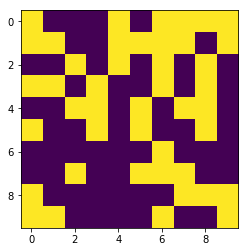

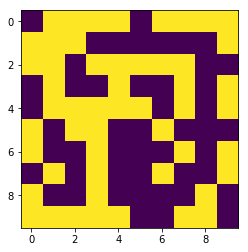

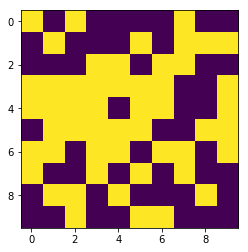

Hopfield Network (Affinity Matrix)


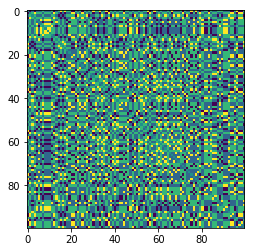

Start Pattern  | Regenerated  |  Differences


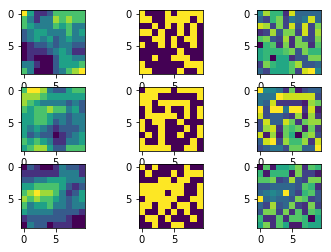

In [522]:
def hopPlot(ins,outs): 
    r = len(ins)
    c = 3
    pltcntr = 1
    for i in range(r):
        p.subplot(r,3,pltcntr)
        p.imshow(ins[i])
        p.subplot(r,3,(pltcntr+1))
        p.imshow(outs[i])
        p.subplot(r,3,(pltcntr+2))
        p.imshow(ins[i]-outs[i])
        pltcntr = pltcntr+3
    return(p)

imagify = lambda p: p.reshape((patternDim, patternDim))
ps = np.array([imagify(p) for p in patterns])
ins = np.array([imagify(i) for i in ins])
outs = np.array([imagify(o) for o in outs])

print("Learned Patterns")
for i in range(len(ps)):
    p.imshow(ps[i])
    p.show()

print("Hopfield Network (Affinity Matrix)")
p.imshow(hn)
p.show()
    
print("Start Pattern  | Regenerated  |  Differences")
hopPlot(ins, outs).show()

**What's going on?**

The above "Learned Patterns" are used to generate the affinity matrix of the Hopfield network.

Next the learned patterns are linearly gaussian blurred (filter size of 3x3).

Then we asynchonously update the pixels of the blurred images using the network's affinity matrix to guess the most likely value based on the rest of the image.

As seen above, even heavily blurred images (with floating point values) restabalize to their original.

This suggests that images compressed or downsampled could be regenerated by a hopfield network (possible compression technique?)